# DATA VISUALISATION

## Load Data

In [1]:
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv('train.csv')

## View Data

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Missing Values

In [4]:
#test.shape

In [5]:
#train.shape

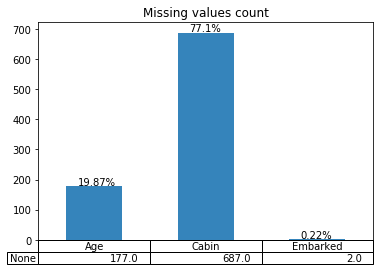

In [6]:
# Missing values

# number of rows
rows_length = train.shape[0]
# fields with missing value count
fields_with_nan_length = train.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind = 'bar', alpha = 0.9, title = 'Missing values count', table = True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [7]:
fields_with_nan_length

Age         177.0
Cabin       687.0
Embarked      2.0
dtype: float64

### statistics about the numerical data

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Survival Rates

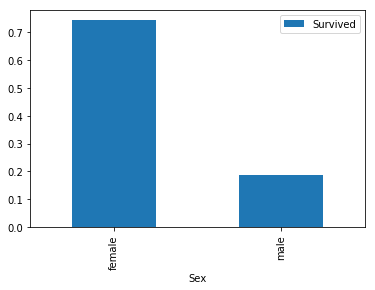

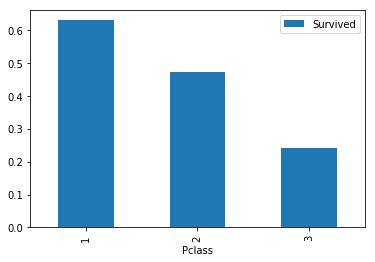

In [9]:
sex_pivot = train.pivot_table(index = "Sex", values = "Survived")
sex_pivot.plot.bar()
plt.show()

pclass_pivot = train.pivot_table(index = 'Pclass', values = 'Survived')
pclass_pivot.plot.bar()
plt.show()

# PREPROCESSING

## Preprocess

### Remove useless columns

In [10]:
train = train.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1)

In [11]:
#train.head(10)

In [12]:
#test.head(10)

### Transform categorical data into numerical

In [13]:
train['Sex'] = [0 if x == 'male' else 1 for x in train['Sex']]
test['Sex'] = [0 if x == 'male' else 1 for x in test['Sex']]

In [14]:
#test.head(10)

### One-hot encoding for Embark

In [15]:
# One hot encoding for Embark on training set
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train.drop(['Embarked'], axis=1, inplace=True)
train = pd.concat([train,embark], axis=1)

In [16]:
#train.head()

In [17]:
# One hot encoding for Embark on test set
embark = pd.get_dummies(test['Embarked'], drop_first=True)
test.drop(['Embarked'],axis=1, inplace=True)
test = pd.concat([test,embark], axis=1)

In [18]:
#test.head()

### Replace Age missing values with data generated from gaussian

In [19]:
from scipy.stats import norm

In [20]:
#training set

np.random.seed(123)
nan_filter = train['Age'].isna()
mu, sigma = norm.fit(train[-nan_filter]['Age'])
norm_dist = np.random.normal(mu, sigma, nan_filter.sum())
train.loc[nan_filter,'Age'] = norm_dist

# set to zero all ages below zero
train.loc[train.Age<0, 'Age'] = 0

In [21]:
#train.info()

In [22]:
#test set

nan_filter = test['Age'].isna()
mu, sigma = norm.fit(test[-nan_filter]['Age'])
norm_dist = np.random.normal(mu, sigma, nan_filter.sum())
test.loc[nan_filter,'Age'] = norm_dist

# set to zero all ages below zero
test.loc[test.Age<0, 'Age'] = 0

In [23]:
#test.info()

### Create six categories for age

In [24]:
train['Age'] = pd.qcut(train['Age'], 6, labels=False)
test['Age'] = pd.qcut(test['Age'], 6, labels=False)

### Replace Fare missing values in test set with data generated from gaussian

152    3
Name: Pclass, dtype: int64


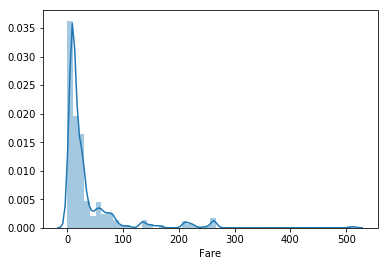

In [25]:
sns.distplot(test['Fare'][~np.isnan(test['Fare'])]);

# Group fare by class
grouped = test.groupby('Pclass').mean()
grouped_fare = grouped['Fare']

# Get row (1 row in this case) that has missing value
nan_filter = test['Fare'].isna()
print(test.loc[nan_filter,'Pclass'])

In [26]:
# Since the missing value comes from a third class passenger, replace missing value
# with mean of third class fares
test.loc[nan_filter,'Fare'] = grouped_fare[2]
print("Number of missing 'Fare' points is in test set {}".format(test['Fare'].isna().sum()))

Number of missing 'Fare' points is in test set 0


### Normalize Fares

In [27]:
max_fare = max(train['Fare'].max(), test['Fare'].max())
train['Fare'] = train['Fare'].apply(lambda fare: fare/max_fare)
test['Fare'] = test['Fare'].apply(lambda fare: fare/max_fare)

In [28]:
#test.head(20)

### Create a new feature Title which contains titles from Names

#### Training Set

In [29]:
# the functions in this module let you check if a particular string matches a given regular expression
import re

train['Title'] = train['Name'].apply(lambda name: re.search(' ([A-Za-z]+)\.', name).group(1))
train = train.drop(['Name'], axis=1) # drop Name which is not useful anymore

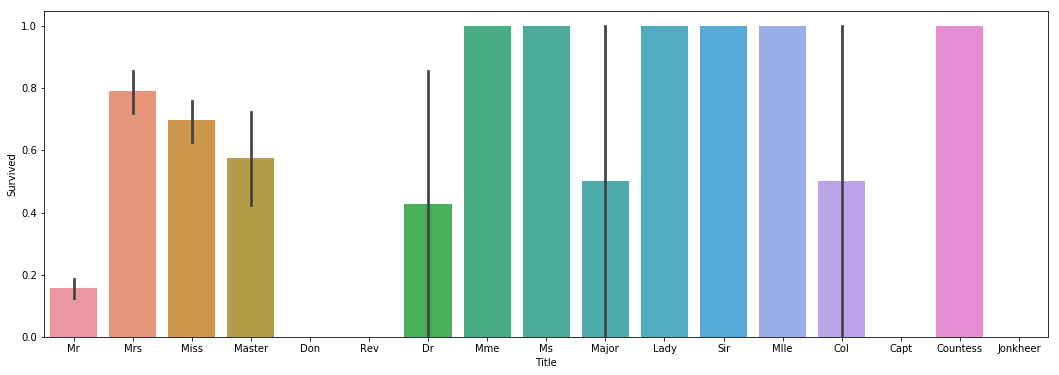

In [30]:
fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x = 'Title', y = 'Survived', data = train, ax=axis1)

In [31]:
# get titles with corresponding survival rate
title_survival = train[['Title', 'Survived']].groupby(['Title'], as_index = False) \
.mean().sort_values(by = 'Survived', ascending = False).values
title_survival

array([['Sir', 1.0],
       ['Countess', 1.0],
       ['Ms', 1.0],
       ['Mme', 1.0],
       ['Lady', 1.0],
       ['Mlle', 1.0],
       ['Mrs', 0.792],
       ['Miss', 0.6978021978021978],
       ['Master', 0.575],
       ['Col', 0.5],
       ['Major', 0.5],
       ['Dr', 0.42857142857142855],
       ['Mr', 0.15667311411992263],
       ['Jonkheer', 0.0],
       ['Don', 0.0],
       ['Rev', 0.0],
       ['Capt', 0.0]], dtype=object)

In [32]:
from itertools import groupby
from operator import itemgetter

# round values and change tuple key
title_survival = list(map(lambda x: (round(float(x[1]), 1), x[0]), title_survival))
title_survival

# hack for a single woman with title 'Dona' which is only present in the test set
# it is marked as surviving since women have larger chance to survive wrt to men
title_survival.insert(0, (1.0, 'Dona'))

In [33]:
title_survival

[(1.0, 'Dona'),
 (1.0, 'Sir'),
 (1.0, 'Countess'),
 (1.0, 'Ms'),
 (1.0, 'Mme'),
 (1.0, 'Lady'),
 (1.0, 'Mlle'),
 (0.8, 'Mrs'),
 (0.7, 'Miss'),
 (0.6, 'Master'),
 (0.5, 'Col'),
 (0.5, 'Major'),
 (0.4, 'Dr'),
 (0.2, 'Mr'),
 (0.0, 'Jonkheer'),
 (0.0, 'Don'),
 (0.0, 'Rev'),
 (0.0, 'Capt')]

In [34]:
# group titles by occurrency rate
title_survival_grouped = \
[(k, list(list(zip(*g))[1])) for k, g in groupby(title_survival, itemgetter(0))]

# get to categorical class mapper
i = 0
title_survival_categorical = list()
for x in title_survival_grouped:
    title_survival_categorical.append((i, x[1]))
    i += 1

# convert Title in train dataframes to categorical
for key, titles in title_survival_categorical:
    train['Title'] = train['Title'].replace(titles, key)

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Title
0,0,3,0,1,1,0,0.014151,0,1,6
1,1,1,1,4,1,0,0.139136,0,0,1
2,1,3,1,2,0,0,0.015469,0,1,2
3,1,1,1,3,1,0,0.103644,0,1,1
4,0,3,0,3,0,0,0.015713,0,1,6


#### Test Set

In [36]:
test['Title'] = test['Name'].apply(lambda name: re.search(' ([A-Za-z]+)\.', name).group(1))
test = test.drop(['Name'], axis=1) # drop Name which is not useful anymore

# convert Title in test dataframes to categorical
for key, titles in title_survival_categorical:
    test['Title'] = test['Title'].replace(titles, key)

In [37]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Title
0,3,0,4,0,0,0.015282,1,0,6
1,3,1,5,1,0,0.013663,0,1,1
2,2,0,5,0,0,0.018909,1,0,6
3,3,0,2,0,0,0.016908,0,1,6
4,3,1,1,1,1,0.023984,0,1,1


## Save Data

In [38]:
train.to_csv('train_preprocessed.csv')
test.to_csv('test_preprocessed.csv')

# Random Forest Classifier

### Import libraries we need for classification

In [39]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

### Split into random train and test subset

In [40]:
survived = train['Survived']
train = train.drop(['Survived'], axis=1)
train = pd.concat([train,survived], axis=1)
X = train.iloc[:, :-1]
y = survived
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Title
0,3,0,1,1,0,0.014151,0,1,6
1,1,1,4,1,0,0.139136,0,0,1
2,3,1,2,0,0,0.015469,0,1,2
3,1,1,3,1,0,0.103644,0,1,1
4,3,0,3,0,0,0.015713,0,1,6


In [41]:
#Istead of applying cross validation we could apply train test split but there may be a problem of overfitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Use grid search for model selection (optional)

In [43]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [5, 10],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [3, 5],
    'n_estimators': [6, 50]
}

clf = RandomForestClassifier(n_estimators=50,
                                max_features=6,
                                criterion='entropy',
                                max_depth=5,
                                bootstrap=True)

grid = GridSearchCV(clf, param_grid = hyperparameters, cv = 10)
grid.fit(X, y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
0.8406285072951739


## Cross validation & Testing

In [44]:
clf = RandomForestClassifier(n_estimators = 50,
                                max_features = 6,
                                criterion = 'entropy',
                                max_depth = 5,
                                bootstrap = True)

scores = cross_val_score(clf, X, y, cv = 10)
print(scores)

from sklearn.model_selection import cross_validate

print("Overal Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.78888889 0.84444444 0.76404494 0.87640449 0.87640449 0.83146067
 0.85393258 0.78651685 0.86516854 0.85227273]
Overal Accuracy: 0.83 (+/- 0.08)


In [45]:
#scores2 = cross_validate(clf,X,y, cv = 10)

In [46]:
#scores2['train_score']

## Feature importance

Print which features where the most important in predicting the outcomes

In [47]:
train_copy = train.drop(['Survived'], axis=1)
clf.fit(X, y)
feat_labels = train_copy.columns[0:]
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%2d %-*s %f" %(f+1,30,feat_labels[indices[f]],importances[indices[f]]))


 1 Title                          0.370942
 2 Pclass                         0.173554
 3 Fare                           0.160422
 4 Sex                            0.159206
 5 SibSp                          0.058254
 6 Age                            0.037393
 7 Parch                          0.018427
 8 S                              0.016431
 9 Q                              0.005372


## Saving the final output

In [48]:
#Prediction on test set using our random forest classifier
survival_results = clf.predict(test)
test = pd.read_csv("test.csv")
result_df = pd.DataFrame(data={'PassengerId': test['PassengerId'].values,'Survived': survival_results})
result_df['Survived'] = [0 if x == False else 1 for x in result_df['Survived']]
#Create output csv file
result_df.to_csv("results.csv")

## Compare our trained model with the real results

In [49]:
trained = pd.read_csv("results.csv")
real = pd.read_csv("gender_submission.csv")

y_pred = trained['Survived']
y_test = real['Survived']

print(metrics.accuracy_score(y_test, y_pred))

0.9114832535885168
